<a href="https://colab.research.google.com/github/dhanyashree02/Samsung-innovation-Campus/blob/main/Regression/Garbage_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = '/content/drive/MyDrive/0.Samsung CSR AIML/Resources/SIC-Artificial-Intelligence/SIC_AI_Coding_Exercises/SIC_AI_Chapter_06_Coding_Exercises/garbage.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
df = pd.read_csv(data)

# Display the first few rows of the DataFrame
display(df.head())

,Unnamed: 0,weight,volume,moisture_content,organic_content,source,waste_type,label
0,0,288.20,1166.79,40.05,1.73,household,metal,0
1,1,220.01,1267.74,41.09,56.69,household,paper,0
2,2,248.94,873.31,10.33,63.33,agricultural,paper,0
3,3,312.04,1031.41,51.91,12.54,agricultural,metal,0
4,4,293.38,1068.42,9.68,61.05,agricultural,paper,0


In [ ]:
X = df.drop('source', axis=1)

# To see the names of the features (columns in X):
print(X.columns)

Index(['Unnamed: 0', 'weight', 'volume', 'moisture_content', 'organic_content',
       'label', 'waste_type_metal', 'waste_type_paper', 'waste_type_plastic'],
      dtype='object')


In [ ]:
X.shape

(1000, 9)

In [ ]:
Y = df['source']

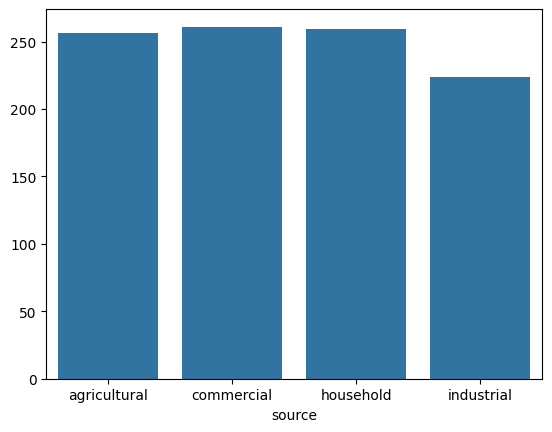

In [ ]:
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
sns.barplot(x=table.index, y=table.values)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(600, 9)
(400, 9)
(600,)
(400,)


In [ ]:
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)

In [ ]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[13 39 35 11]
 [16 33 47 10]
 [14 36 45  7]
 [10 37 37 10]]


In [ ]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[13 39 35 11]
 [16 33 47 10]
 [14 36 45  7]
 [10 37 37 10]]


In [ ]:
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test, average='weighted')
precision = metrics.precision_score(Y_test,Y_pred_test, average='weighted')
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.252
Sensitvity  = 0.252
Precision   = 0.252


In [ ]:
Y_pred_test_prob = LL.predict_proba(X_test)

In [ ]:
# cutoff = 0.7                                                      # cutoff can be a value between 0 and 1.
# Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[13 39 35 11]
 [16 33 47 10]
 [14 36 45  7]
 [10 37 37 10]]


In [ ]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.115
Sensitvity  = 0.673
Specificity = 0.25
Precision   = 0.458


In [ ]:
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []

In [ ]:
# Convert Y_test to binary numerical labels (assuming 'household' is the positive class)
Y_test_binary = (Y_test == 'household').astype(int)

for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test_binary,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)

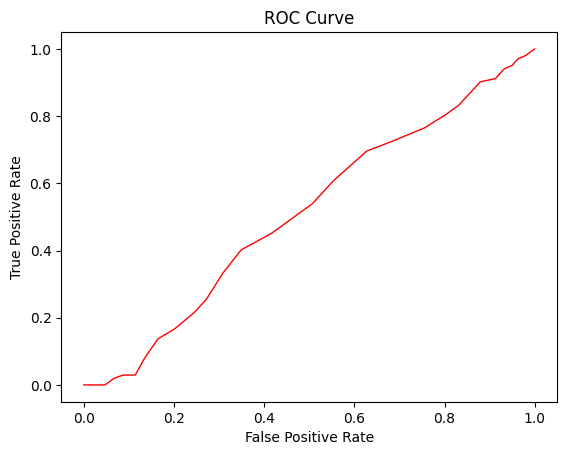

In [ ]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Get the index of the 'household' class
household_class_index = LL.classes_.tolist().index('household')

# Get the probabilities for the 'household' class
Y_pred_test_prob_household = Y_pred_test_prob[:, household_class_index]

# Calculate FPR, TPR, and cutoffs using metrics.roc_curve
FPR, TPR, cutoffs = metrics.roc_curve(Y_test, Y_pred_test_prob_household, pos_label='household')

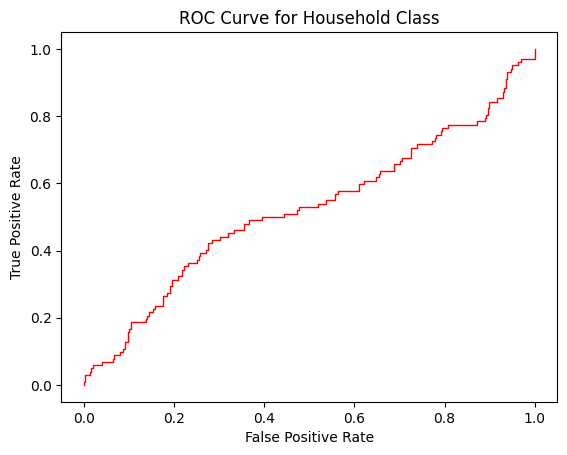

In [ ]:
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Household Class')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob, multi_class='ovr', average='weighted')
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.489
